# Initial Setup and data understanding

### Import Libraries

In [85]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind

### Reading the dataset

In [70]:
# Reading the data from CSV into a pandas Dataframe
marketing = pd.read_csv('../data/project_datasets/marketing_campaign_analysis/marketing.csv')

In [71]:
# First five rows of the dataset
marketing.head(5)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [72]:
# Summary statistics
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


In [73]:
# Non-null's and datatypes of the columns in the dataset
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


In [74]:
# Checking datatype of 'is_retained' column
print(marketing['is_retained'].dtype)

# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')

# Check the data type of is_retained, again
print(marketing['is_retained'].dtype)

object
bool


Currently, the date columns in the marketing DataFrame are being incorrectly read as objects. 

We need to convert these columns to date columns to be able to use Python and pandas' robust date manipulation and formatting capabilities.

In [75]:
# Import marketing.csv with date columns as they are being read as objects
marketing = pd.read_csv('../data/project_datasets/marketing_campaign_analysis/marketing.csv',\
                         parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

# Add a DoW column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

/var/folders/jn/9nlkdx3s70bfdjtw_1q5jnvm0000gn/T/ipykernel_5752/1776409986.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('../data/project_datasets/marketing_campaign_analysis/marketing.csv',\
/var/folders/jn/9nlkdx3s70bfdjtw_1q5jnvm0000gn/T/ipykernel_5752/1776409986.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('../data/project_datasets/marketing_campaign_analysis/marketing.csv',\
/var/folders/jn/9nlkdx3s70bfdjtw_1q5jnvm0000gn/T/ipykernel_5752/1776409986.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing

In [76]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
 12  DoW                  1856 non-null   float64       
dtypes: datetime64[ns](3), float64(1

### Feature Engineering

Adding new columns that derive information from existing data or based on domain knowledge is known as Feature Engineering.

Creating the new features mentioned below:

`channel_code`: represents the numeric value of the subscribing channel

`is_correct_lang`: conveys whether the ad was shown to the user in their preferred language

In [77]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)


# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(marketing['language_preferred'] == marketing['language_displayed'], 'Yes', 'No')

In [78]:
marketing

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,channel_code,is_correct_lang
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,0.0,1.0,Yes
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,0.0,1.0,Yes
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,0.0,1.0,Yes
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,0.0,1.0,Yes
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,0.0,1.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False,2.0,4.0,Yes
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaT,Email,True,2.0,4.0,Yes
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaT,Email,True,2.0,4.0,Yes
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaT,Email,True,2.0,4.0,Yes


### Initial Exploratory Analysis

#### Daily marketing reach by channel

In [79]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


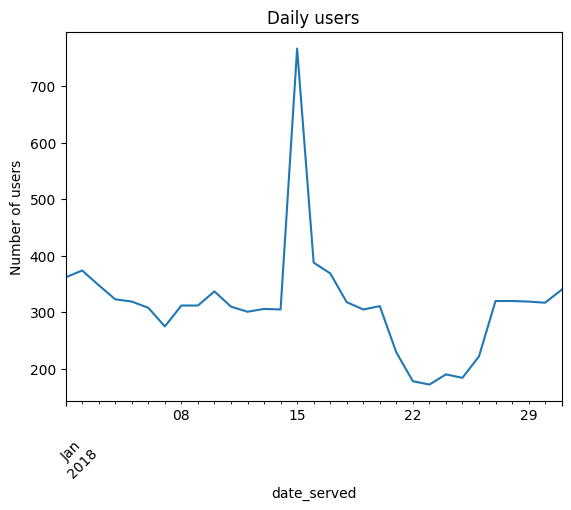

In [80]:
# Plot daily_users
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

**Insight:** *Much like in daily users who view marketing assets, there's a large peak around the time when an email blast goes out.*

# Exploratory Analysis & Summary Statistics

#### Marketing terms and metrics

Was the campaign successful?

*Common metrics:*
- **Conversion rate**: For a marketing team, campaign success is typically measured by conversion rate. Of all the people who came into contact with the marketing campaign, how many bought the product? Depending on the business, this could mean that a person made a purchase or subscribed to the service. 

`Conversion rate = (Number of people who convert / Total number of people we marketed to)`

- **Retention Rate**: Once a user has signed up for a subscription, are they still a subscriber one, three or twelve months in? This metric can be particularly difficult to measure because it requires patience. We can't know 90-day retention rates until 90 days have passed since a user initially subscribed.

`Retention rate = Number of people who remain subscribed / Total number of people who converted`

Calculating conversion rate

In [15]:
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing["converted"] == True]['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers/total
print(round(conversion_rate*100, 2), "%")

13.89 %


Is this a good conversion rate? This will depend heavily on the business. There is no particular number that all marketing teams are trying to reach. Instead, when we're working on a marketing team, it helps to look at historical data to determine whether a conversion rate is what we would expect.

Calculating retention rate

In [16]:
# Calculate the number of subscribers
total_subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()

# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained'] == True]['user_id'].nunique()

# Calculate the retention rate
retention_rate = (retained/total_subscribers)
print(round(retention_rate*100, 2), "%")

66.8 %


Much like with conversion rate, there is no retention rate that will apply across businesses and industries. 

Look at historical retention rates or retention rates of companies in a similar industry to interpret the results.

### Customer segmentation

Comparing language conversion rate (I)

The marketing team wants to determine how effective the campaign was on converting English speakers.

In [17]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of English speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]['user_id'].nunique()
# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


Comparing language conversion rate (II)

Next, we want to look at the conversion rate by the language that the marketing asset was shown in. While many of your users speak English, some prefer another language. We'll check to make sure marketing material translated well across languages.



In [18]:
# Group by language_displayed and count unique users
total = marketing.groupby(['language_displayed'])['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted'] == True].groupby(['language_displayed'])['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers / total
print(round((language_conversion_rate*100),1))

language_displayed
Arabic     50.0
English    12.9
German     71.6
Spanish    20.0
Name: user_id, dtype: float64


**Insight:** *We notice the conversion rate is much lower for English and Spanish.*

The marketing team wants to know whether there is any difference in the conversion rate based on when in the month, the users saw an ad.

In [19]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id'].nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted'] == True].groupby(['date_served'])['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


### Plotting campaign results (I)

Visualize conversion rate by language

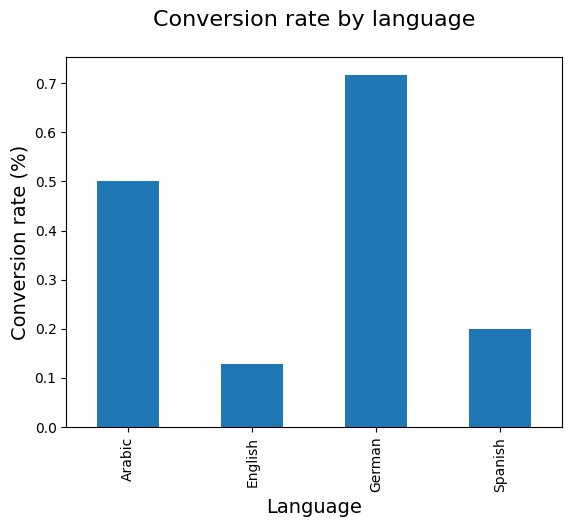

In [20]:
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind='bar')

# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)

# Display the plot
plt.show()

**Insight:** *This plot shows that German and Arabic speakers have much higher conversion rates than English and Spanish speakers.*

In [21]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id'].nunique()


# Group by date_served and calculate subscribers
subscribers = marketing[marketing['converted'] == True].groupby(['date_served'])['user_id'].nunique()
# Calculate the conversion rate for all languages
daily_conversion_rates = subscribers/total

In [22]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rates.reset_index())

# Rename columns
daily_conversion_rate.columns = ['date_served', 
                              'conversion_rate']

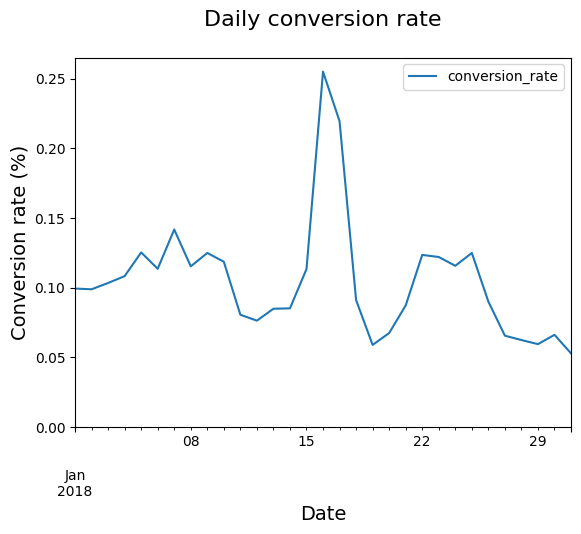

In [23]:
# Create a line chart using daily_conversion_rate
daily_conversion_rate.plot('date_served', 'conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

**Insight:** *The conversion rate is relatively steady except for one day in January.*

#### Plotting campaign results (II)

**Marketing channels across age groups**

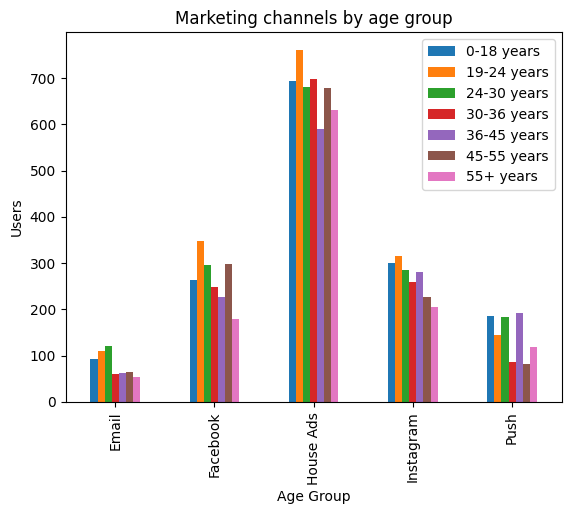

In [24]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot channel_age
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

**Insight:** *Email is not reaching older age groups, and Facebook is not reaching many people under 18.*

Stakeholders have begun competing to see whose channel had the best retention rate from the campaign. You must first determine how many subscribers came from the campaign and how many of those subscribers have stayed on the service.

It's important to identify how each marketing channel is performing because this will affect company strategy going forward. If one channel is outperforming others, it might signal the channel merits further investment.

In [25]:
# Count the subs by subscribing channel and day
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_total.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


In [26]:
# Sum the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained'] == True].groupby(['date_subscribed', 'subscribing_channel'])['user_id'].nunique()
# Print results
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


### Analyzing retention rates for the campaign

Now that we've calculated the total subscribers and retained subscribers, we can settle the question of which channel had the highest retention rate.

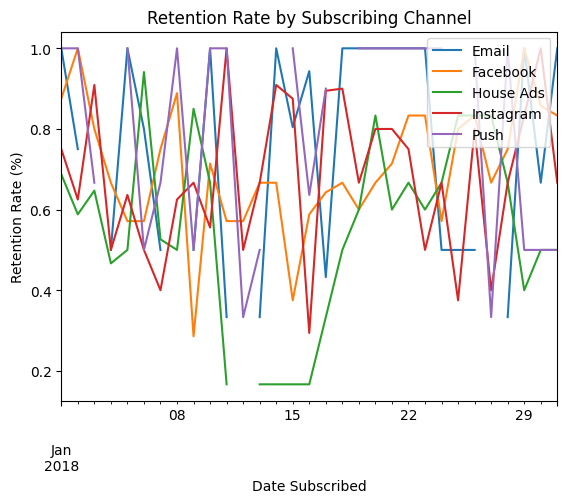

In [27]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = 'upper right', labels=retention_rate_df.columns.values )
plt.show()

# Conversion Attribution

## Automation

### Retention function

In [28]:
def retention_rate(dataframe, column_names):

    #Group by column_names and calculate retention
    retained = dataframe[dataframe['is_retained'] == True].groupby(column_names)['user_id'].nunique()

    #Group by column_names and calculate conversion
    converted = dataframe[dataframe['converted'] ==  True].groupby(column_names)['user_id'].nunique()

    retention_rate = retained/converted

    retention_rate = retention_rate.fillna(0)
    return retention_rate

Retention Rate by Channel

In [29]:
daily_retention = retention_rate(marketing, ['date_subscribed', 'subscribing_channel'])

daily_retention = pd.DataFrame(daily_retention.unstack(level=1))

print(daily_retention.head())

subscribing_channel  Email  Facebook  House Ads  Instagram      Push
date_subscribed                                                     
2018-01-01            1.00  0.875000   0.687500   0.750000  1.000000
2018-01-02            0.75  1.000000   0.588235   0.625000  1.000000
2018-01-03            0.00  0.800000   0.647059   0.909091  0.666667
2018-01-04            1.00  0.666667   0.466667   0.500000  0.000000
2018-01-05            1.00  0.571429   0.500000   0.636364  1.000000


### Plotting Function

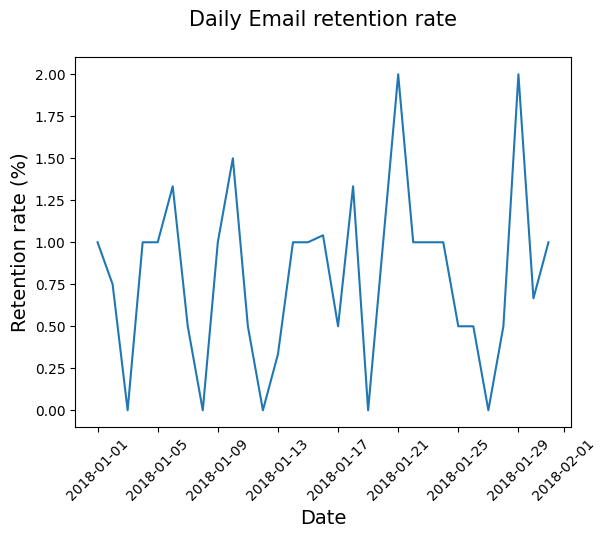

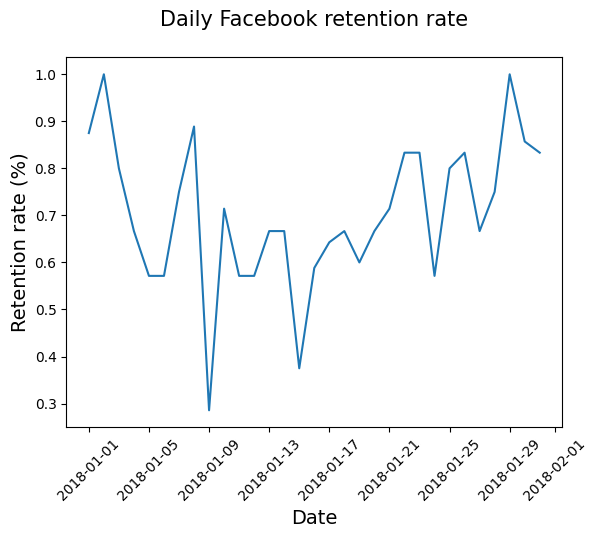

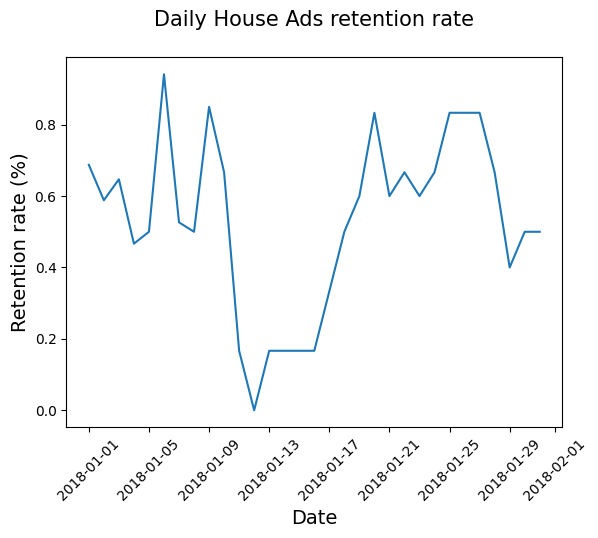

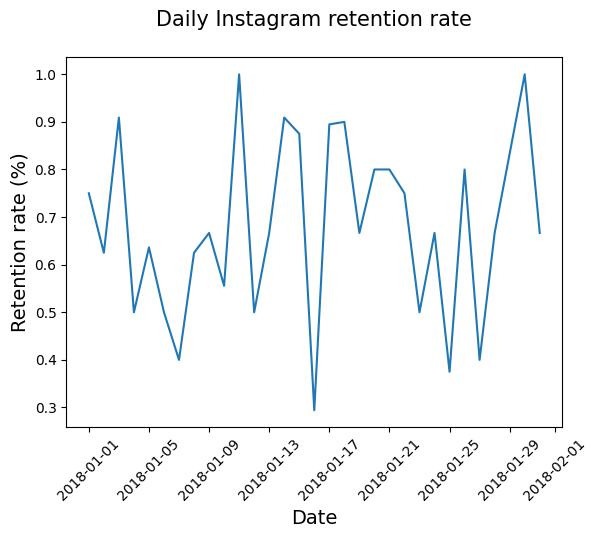

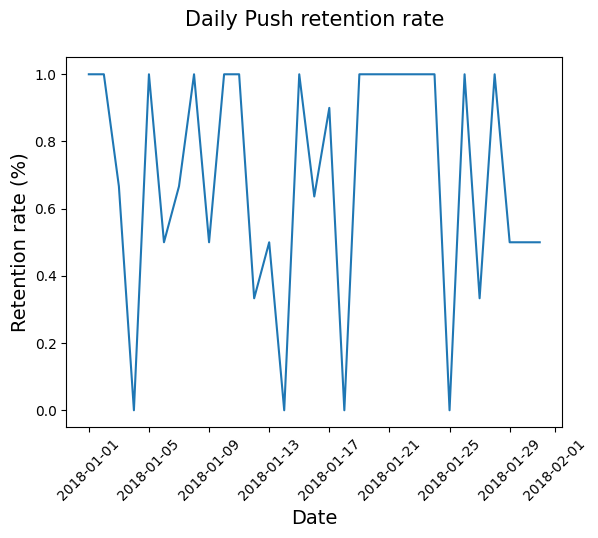

In [30]:
def plotting(dataframe):
    for column in dataframe:
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + column + ' retention rate\n', size = 15)
        plt.ylabel('Retention rate (%)', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation = 45)
        plt.show()

plotting(daily_retention)

### Conversion Rate Function

In [31]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64


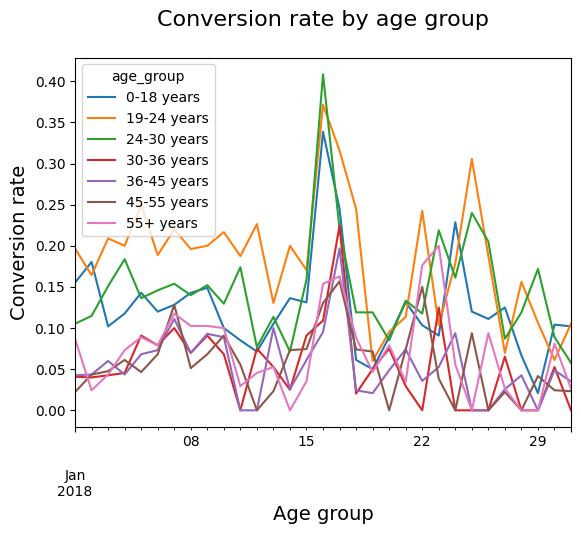

In [32]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
print(age_group_conv)

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level = 1))

# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

To see if that trend has changed over time.

Marketing has been changing their strategy and wants to make sure that their new method isn't alienating age groups that are less comfortable with their product.

In [33]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation = 45)
        # Show plot
        plt.show()  
        plt.clf()

The marketing stakeholders have requested a report of the daily conversion rate for each age group. They want to refresh this report on a monthly cadence. This is a perfect opportunity to utilize the functions. Not only will the functions help get this report out promptly today, but it will also help each month when it's time for a refresh of the data.



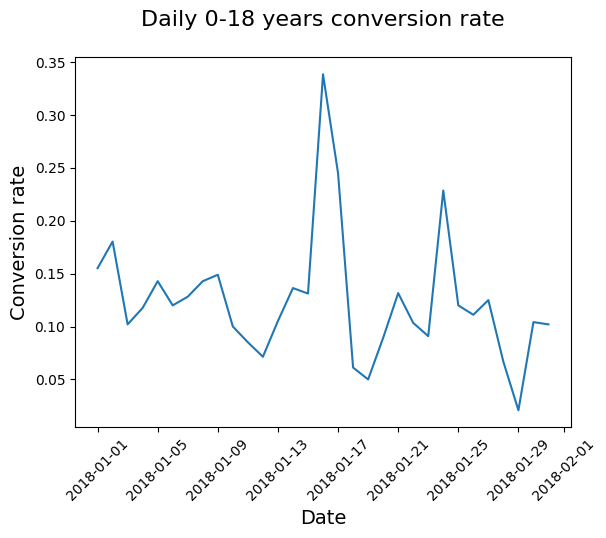

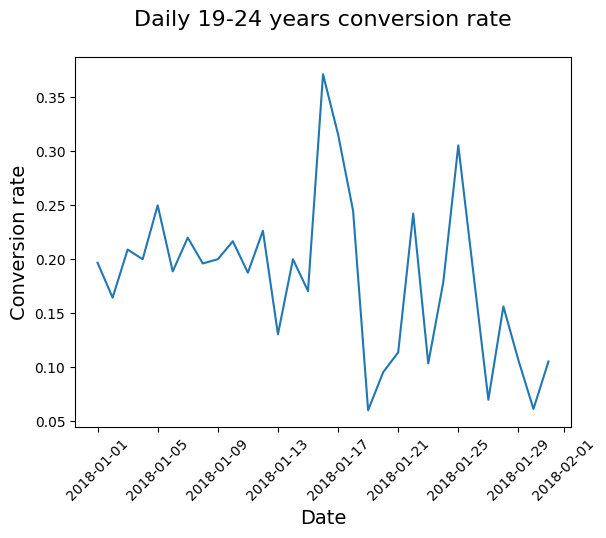

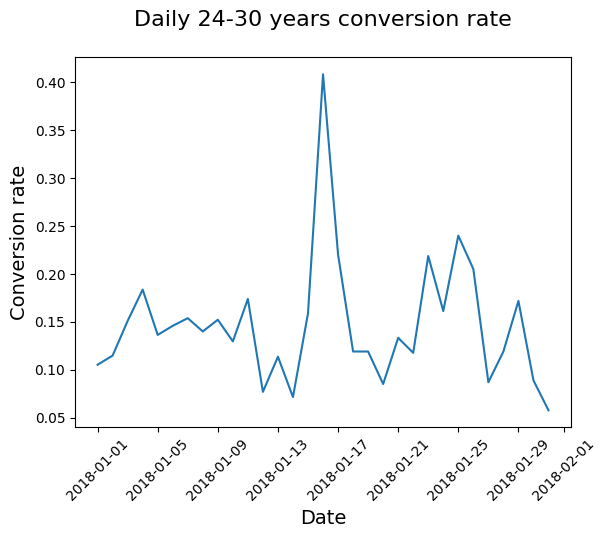

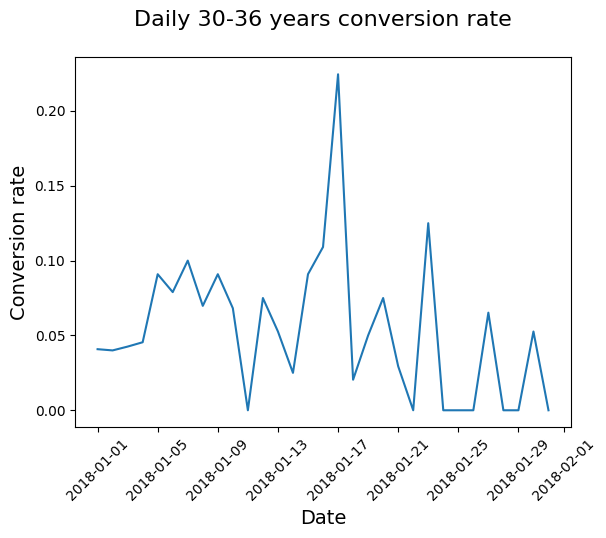

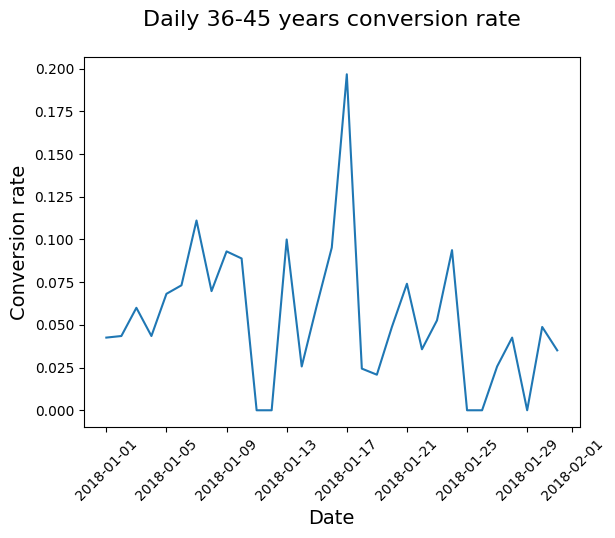

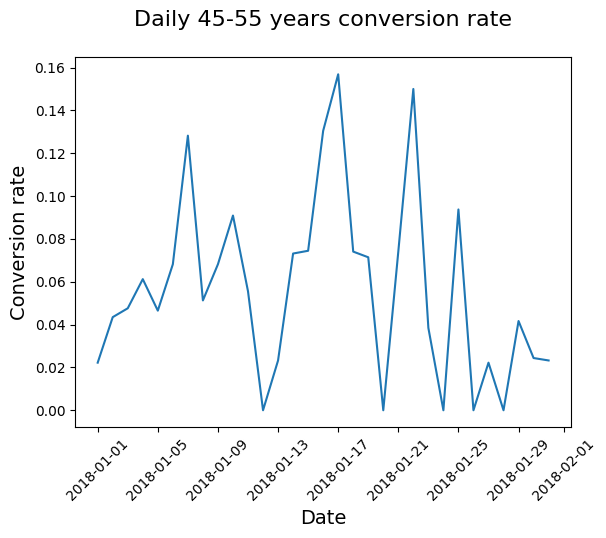

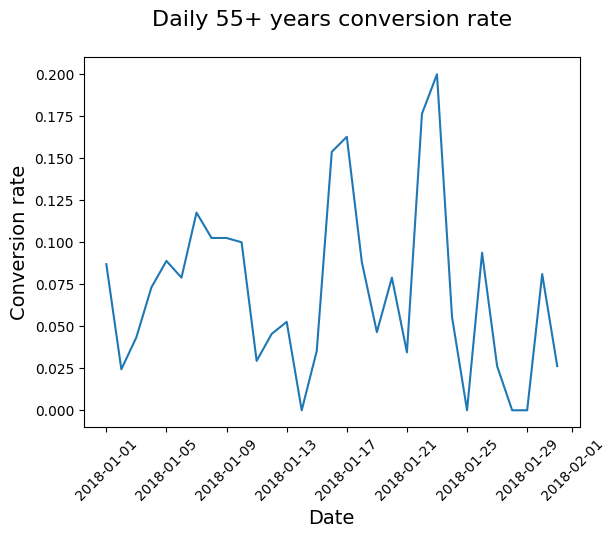

<Figure size 640x480 with 0 Axes>

In [34]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

### Identifying inconsistencies

In [35]:
DoW_retention = retention_rate(marketing, ['DoW'])

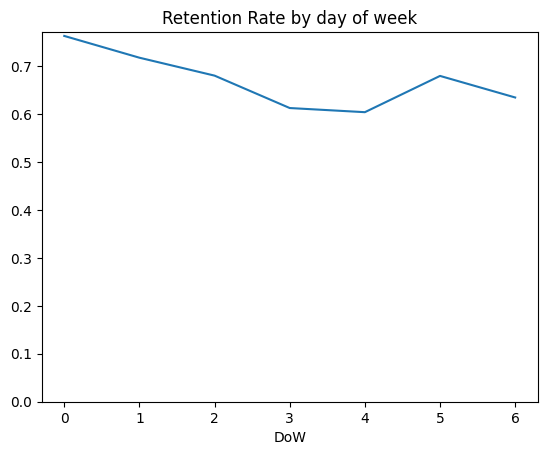

In [36]:
DoW_retention.plot()
plt.title('Retention Rate by day of week')
plt.ylim(0)
plt.show()

There does appear to be some relationship where retention is lower if users subscribe later in the week, but this difference is small and is likely indicative of something else, such as sending more emails on the weekend which converts lower intent users. This is all to say, weekday fluctuations are common and do not necessarily merit raising a red flag even if you see a consistent pattern, but it might mean modifying when you attempt to market to customers most heavily.

The house ads team has become worried about some irregularities they've noticed in conversion rate. 

It is common for stakeholders to come to Data Scientists with concerns they've noticed around changing metrics. 

It's the data scientists' job to determine whether these changes are natural fluctuations or if they require further investigation.

In [37]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 'marketing_channel'])

print(daily_conv_channel.head())

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64


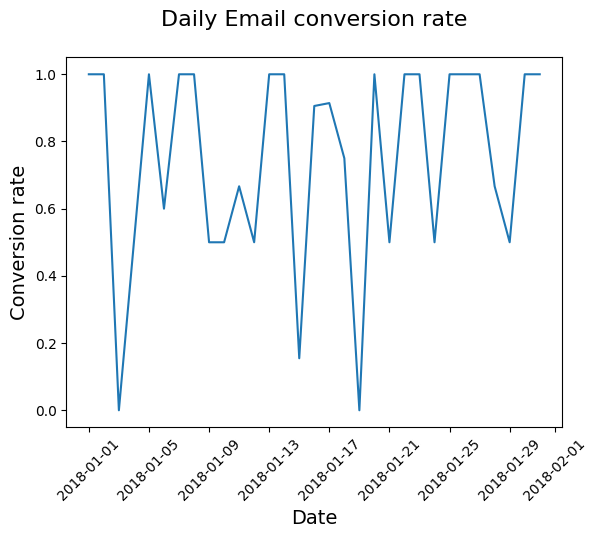

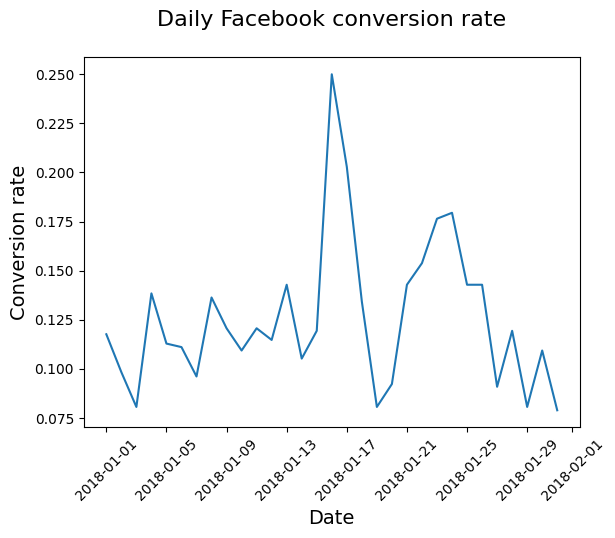

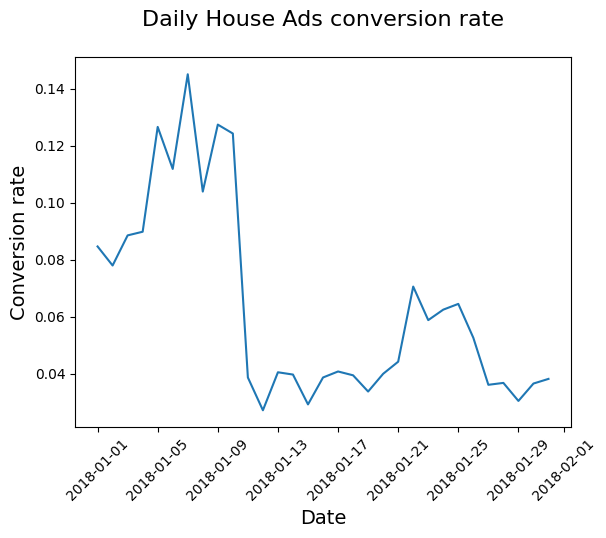

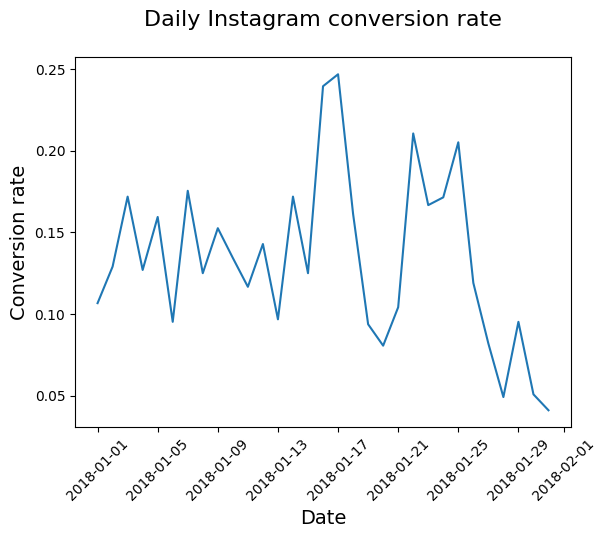

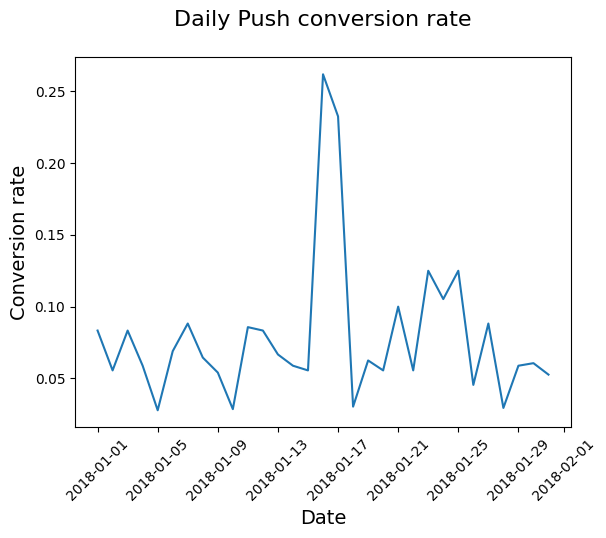

<Figure size 640x480 with 0 Axes>

In [38]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 
                                                 'marketing_channel'])

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

House ads conversion has been down since January 11 and we'll try to identify potential causes for the decrease.

As data scientists supporting a marketing team, we will run into fluctuating metrics all the time. It's vital to identify if the fluctuations are due to expected shifts in user behavior (i.e., differences across the day of the week) versus a larger problem in technical implementation or marketing strategy.



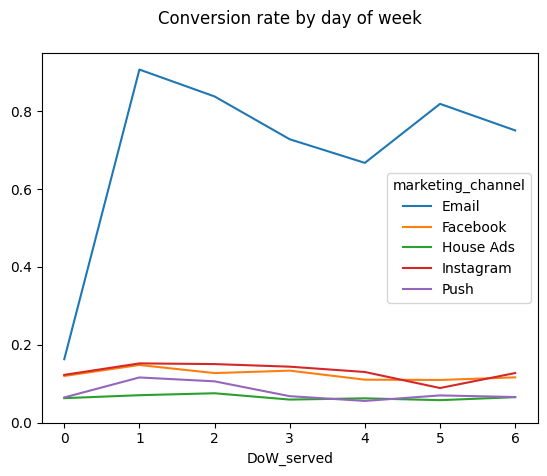

In [39]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 'marketing_channel'])


# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

Email is particularly high and may be reflective of a tracking error, but house ads appear stable across the week with a slight peak on Tuesday.

### House ads conversion by language
Now that we've ruled out natural fluctuations across the day of the week a user saw the marketing assets as they cause for decreasing house ads conversion, we will take a look at conversion by language over time. Perhaps the new marketing campaign does not apply broadly across different cultures.

Ideally, the marketing team will consider cultural differences prior to launching a campaign, but sometimes mistakes are made, and it will be data scientists job to identify the cause.
 
Often data scientists are the first line of defense to determine what went wrong with a marketing campaign. It's their job to think creatively to identify the cause.

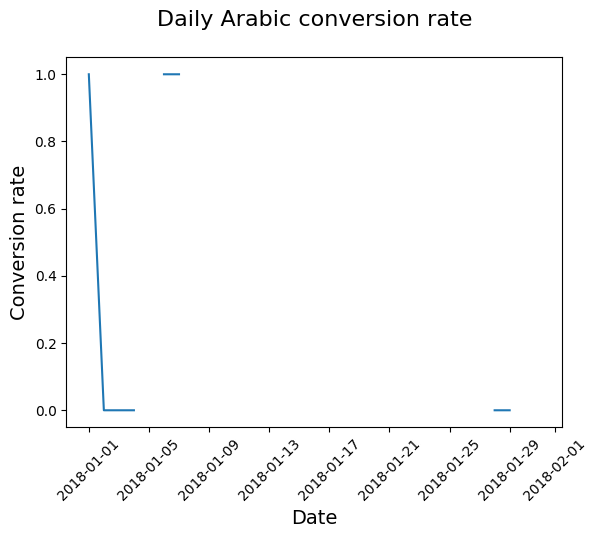

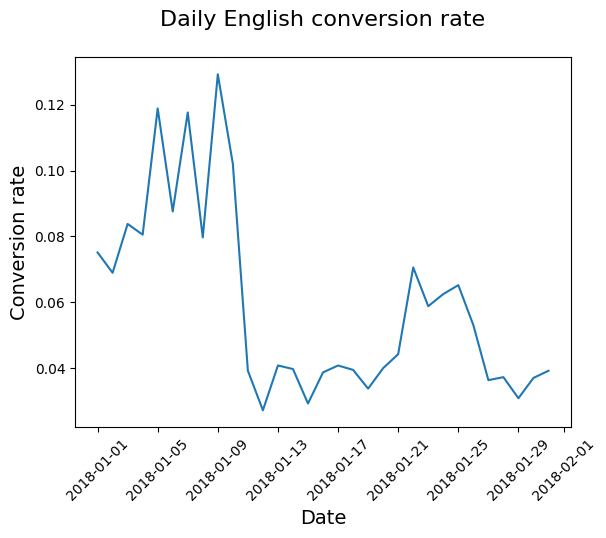

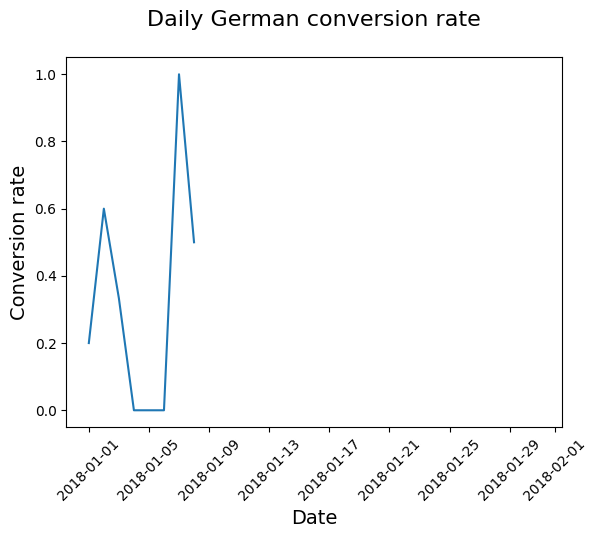

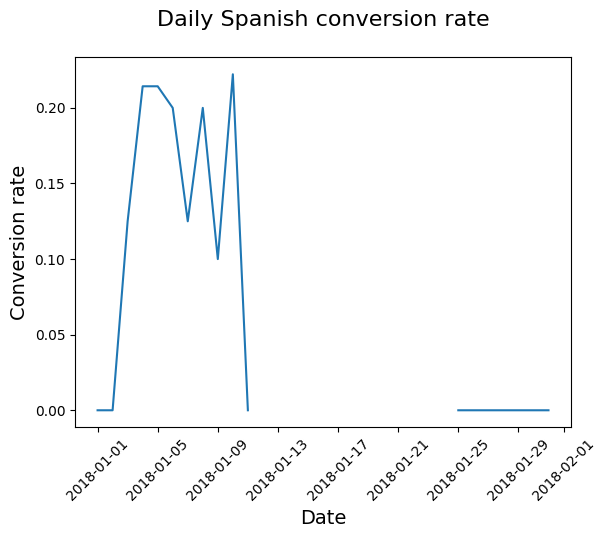

<Figure size 640x480 with 0 Axes>

In [40]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served', 'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use your plotting function to display results
plotting_conv(conv_lang_df)

As we can see, the English conversion rate drops around the 11th, and there do not appear to be ads served in other languages for a two week period. We will investigate further.

The house ads team is concerned because they've seen their conversion rate drop suddenly in the past few weeks. In the previous sections, we confirmed that conversion is down because we noticed a pattern around language preferences.

As a data scientist, it is our job to provide the marketing stakeholders with as specific feedback as possible as to what went wrong to maximize their ability to correct the problem so that the team doesn't repeat their mistake.

In [41]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_displayed'] == house_ads['language_preferred'], 
    'Yes', 
    'No')

# Groupby date_served and correct_language
language_check = house_ads.groupby(['date_served', 'is_correct_lang'])['is_correct_lang'].count()


# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


/var/folders/jn/9nlkdx3s70bfdjtw_1q5jnvm0000gn/T/ipykernel_5752/971801506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads['is_correct_lang'] = np.where(


Interesting. As we can see, the English conversion rate drops around the 11th, and there do not appear to be ads served in other languages for a two week period.

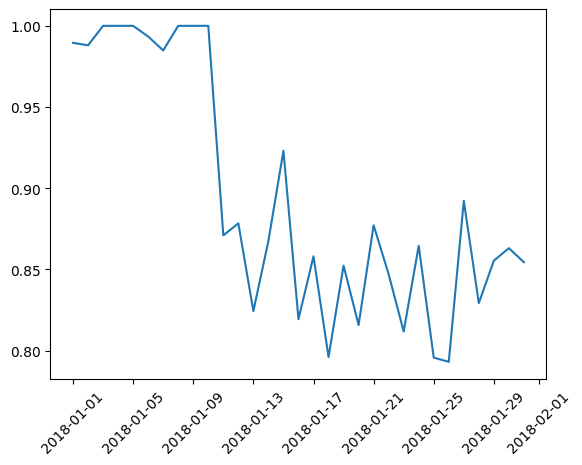

In [42]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes'] / language_check_df.sum(axis=1)


# Plot and show your results
plt.plot(language_check_df.index, language_check_df['pct'])
plt.xticks(rotation = 45)
plt.show()

Great work! We have shown that house ads have been underperforming due to serving all ads in English rather than each user's preferred language

### Resolving Inconsistencies

#### Assessing impact

We can estimate what conversion might have looked like if there had been no issues. One way to assess impact is to index all other languages' conversion rates to English during the period where the ads were running in the correct language for each user.

In [43]:
# Calculate pre-error conversion rate
# Bug arose sometime arounf '2018-01-11'

# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, 'language_displayed')

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


What these indexes mean is that Spanish-speaking users typically convert 1.7 times the rate of English-speakers and Arabic and German speakers convert at about 4-5 times the rate compared to English-speakers.

### Analyzing user preferences
To understand the true impact of the bug, it is crucial to determine how many subscribers we would have expected had there been no language error. This is crucial to understanding the scale of the problem and how important it is to prevent this kind of error in the future.

In this step, we will create a new DataFrame that we can perform calculations on to determine the expected number of subscribers. This DataFrame will include how many users prefer each language by day. Once you have the DataFrame, we can begin calculating how many subscribers we would have expected to have had the language bug not occurred.

In [44]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served', 'language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level = 1))

In [50]:
print(converted_df.shape)
print(converted.shape)
print(converted_df.head(5))
print(converted.head(5))

(31, 8)
(119, 2)
                   user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   

                            
language_preferred Spanish  
date_served                 
2018-01-01               0  
2018-01-02               0  
2018-01-03               1  
2018-01-04               3  
2018-01-05               3  
                                user_id converted
date_served language_preferred                   
2018-01-01  Arabic        

### Creating a DataFrame based on indexes
Now that we've created an index to compare English conversion rates against all other languages, we will build out a DataFrame that will estimate what daily conversion rates should have been if users were being served the correct language.

An expected conversion DataFrame named converted has been created below by grouping `house_ads` by `date` and `preferred language`. It contains a count of unique users as well as the number of conversions for each language, each day.

For example, we can access the number of Spanish-speaking users who received house ads using `converted[('user_id','Spanish')]`.

In [51]:
converted = house_ads.groupby(['date_served', 'language_preferred']).agg(
    user_id=('user_id', 'nunique'),  # Count unique users
    converted=('converted', 'sum')   # Sum conversions
).unstack()  # Converts the language into MultiIndex columns


In [52]:
print(converted.shape)
print(converted.head(5))

(31, 8)
                   user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   

                            
language_preferred Spanish  
date_served                 
2018-01-01               0  
2018-01-02               0  
2018-01-03               1  
2018-01-04               3  
2018-01-05               3  


In [53]:
converted[('user_id', 'Spanish')]

date_served
2018-01-01    11.0
2018-01-02    10.0
2018-01-03     8.0
2018-01-04    14.0
2018-01-05    14.0
2018-01-06    11.0
2018-01-07    10.0
2018-01-08    10.0
2018-01-09    10.0
2018-01-10    18.0
2018-01-11    13.0
2018-01-12    11.0
2018-01-13    16.0
2018-01-14    12.0
2018-01-15    10.0
2018-01-16    17.0
2018-01-17    16.0
2018-01-18    18.0
2018-01-19    12.0
2018-01-20    14.0
2018-01-21     9.0
2018-01-22     8.0
2018-01-23     9.0
2018-01-24     8.0
2018-01-25    11.0
2018-01-26    16.0
2018-01-27    12.0
2018-01-28    21.0
2018-01-29    15.0
2018-01-30    18.0
2018-01-31    16.0
Name: (user_id, Spanish), dtype: float64

In [54]:
# Create English conversion rate column for affected period
converted['english_conv_rate'] = converted.loc['2018-01-11':'2018-01-31'][('converted', 'English')] / converted.loc['2018-01-11':'2018-01-31'][('user_id', 'English')]

# Create expected conversion rates for each language
converted['expected_spanish_rate'] = converted['english_conv_rate'] * spanish_index
converted['expected_arabic_rate'] = converted['english_conv_rate'] * arabic_index
converted['expected_german_rate'] = converted['english_conv_rate'] * german_index

# Multiply number of users by the expected conversion rate
converted['expected_spanish_conv'] = (converted['expected_spanish_rate'] / 100) * converted[('user_id', 'Spanish')]
converted['expected_arabic_conv'] = (converted['expected_arabic_rate'] / 100) * converted[('user_id', 'Arabic')]
converted['expected_german_conv'] = (converted['expected_german_rate'] / 100) * converted[('user_id', 'German')]

In [57]:
converted.head(5)

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-11             7.0   133.0    2.0    13.0         0       6      0   
2018-01-12             3.0   129.0    4.0    11.0         0       3      0   
2018-01-13             6.0   121.0    5.0    16.0         0       5      1   
2018-01-14             5.0   131.0    3.0    12.0         0       6      0   
2018-01-15             2.0   189.0    4.0    10.0         0       6      0   

                           english_conv_rate expected_spanish_rate  \
language_preferred Spanish                                           
date_served                                                          
2018-01-11               0          0.045113              0.075876   
2018-01-12               1          0.023256              0.039115   
2018-01-13               0          0.041322              0.069501   
2018-01-14               0          0.045802              0.077035   
2018-01-15               0          0.031746              0.053394   

                   expected_arabic_rate expected_german_rate  \
language_preferred                                             
date_served                                                    
2018-01-11                     0.227629             0.202337   
2018-01-12                     0.117344             0.104305   
2018-01-13                     0.208503             0.185336   
2018-01-14                     0.231104             0.205426   
2018-01-15                     0.160183             0.142385   

                   expected_spanish_conv expected_arabic_conv  \
language_preferred                                              
date_served                                                     
2018-01-11                      0.009864             0.015934   
2018-01-12                      0.004303              0.00352   
2018-01-13                       0.01112              0.01251   
2018-01-14                      0.009244             0.011555   
2018-01-15                      0.005339             0.003204   

                   expected_german_conv  
language_preferred                       
date_served                              
2018-01-11                     0.004047  
2018-01-12                     0.004172  
2018-01-13                     0.009267  
2018-01-14                     0.006163  
2018-01-15                     0.005695

### Assessing bug impact
It's time to calculate how many subscribers were lost due to mistakenly serving users English rather than their preferred language. Once the team has an estimate of the impact of this error, they can determine whether it's worth putting additional checks in place to avoid this in the future—you might be thinking, of course, it's worth it to try to prevent errors! In a way, you're right, but every choice a company makes requires work and funding. The more information the team has, the better they will be able to evaluate this trade-off.

The DataFrame `converted` contains expected subscribers columns for Spanish, Arabic and German language speakers named `expected_spanish_conv`, `expected_arabic_conv` and `expected_german_conv` respectively.

In [55]:
# Use .loc to slice only the relevant dates
converted = converted.loc['2018-01-11':'2018-01-31']

expected_subs = converted['expected_spanish_conv'].sum() + converted['expected_arabic_conv'].sum() + converted['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted[('converted','Spanish')].sum() + converted[('converted','Arabic')].sum() + converted[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

-25.495425075261792


lost_subs = expected_subs - actual_subs

print(lost_subs)

32.14414319248826

# Personalization A/B Test - A/B Testing for Marketing

**A/B Testing**

- A/B testing refers to a randomized experiment which evaluates which variant performs better. In order for our tests to have meaning, we must have a clear control. The control should be something that currently exists and is running in production. 
- Each variant in the test should have only one major change from the control; otherwise, it will be impossible to parse what led to the change in your key metrics. Prior to beginning a test, you must develop a hypothesis and determine which metric you are trying to impact. 
- Always set key metrics ahead of running the test. It's easy to redefine success in retrospect, especially if you are under pressure to find a positive result. 
- If you document success metrics ahead of time, you can maintain clarity around the success of the test.

**Personalized email test**


- The focus of this section will be the A/B test that was run where half the emails were generic upsells to our product while the other half contained personalized messaging around individual usage of our site. 
- It is a high-level look into how A/B tests are conducted in marketing departments.

**Test Allocation**

The email portion of this campaign was actually run as an A/B test. Half the emails sent out were generic upsells to your product while the other half contained personalized messaging around the users’ usage of the site.

Before we begin analyzing the results, we will check to ensure users were allocated equally to the test and control groups.

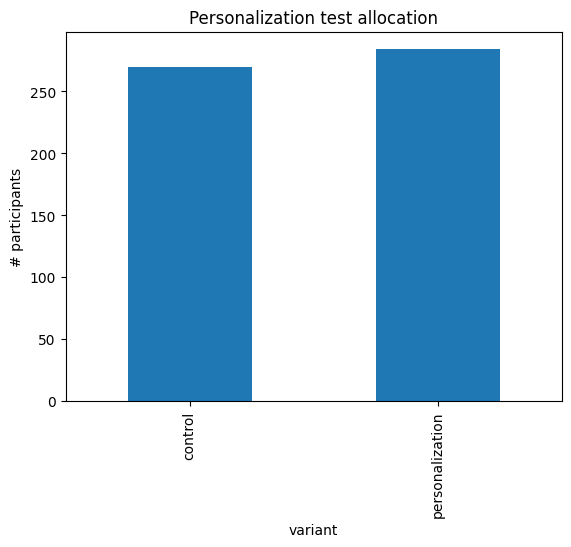

In [59]:
# Subset the DataFrame
email = marketing[marketing['marketing_channel'] == 'Email']

# Group the email DataFrame by variant 
alloc = email.groupby(['variant'])['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

**Comparing conversion rates**

Now that we know allocation is relatively even let's look at the conversion rate for the control and personalization. Since we chose conversion rate as our key metrics for this test, it is highly important that we evaluate whether or not conversion was higher in the personalization treatment compared with the control. 

Measuring the difference between the key metric in the control and the treatment is the most important part of evaluating the success of an A/B test.

In [63]:
print(email.shape)
print(email.columns)
email.head(5)

(565, 16)
Index(['user_id', 'date_served', 'marketing_channel', 'variant', 'converted',
       'language_displayed', 'language_preferred', 'age_group',
       'date_subscribed', 'date_canceled', 'subscribing_channel',
       'is_retained', 'DoW', 'channel_code', 'is_correct_lang', 'DoW_served'],
      dtype='object')


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,channel_code,is_correct_lang,DoW_served
354,a100000526,2018-01-01,Email,personalization,True,Arabic,Arabic,0-18 years,2018-01-01,NaT,Email,True,0.0,4.0,Yes,0.0
358,a100000530,2018-01-05,Email,personalization,True,Arabic,Arabic,19-24 years,2018-01-05,NaT,Email,True,4.0,4.0,Yes,4.0
362,a100000534,2018-01-09,Email,personalization,False,English,English,45-55 years,2018-01-09,NaT,Email,True,1.0,4.0,Yes,1.0
366,a100000538,2018-01-13,Email,personalization,True,Arabic,Arabic,24-30 years,2018-01-13,2018-01-23,Email,False,5.0,4.0,Yes,5.0
370,a100000542,2018-01-17,Email,personalization,True,English,English,0-18 years,2018-01-17,2018-02-12,Email,False,2.0,4.0,Yes,2.0


In [64]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


We can see that personalization converted users at a higher rate than the control. Next, we will build a lift function to quantify by how much.

#### Calculating lift & significance testing

**Treatment performance compared to the control**

(Treatment conversion rate - Control conversion rate) / Control conversion rate

*Was the conversion rate higher for the treatment and by how much?*

Lift is calculated by taking the difference between the treatment conversion rate and the control conversion rate divided by the control conversion rate. The result is the relative percent difference of treatment compared to control.


- One way to calculate statistical significance is by conducting a two-sample t-test. A t-test uses the mean and the sample variance to determine the likelihood that the variation between the two samples occurred by chance. 

- The t-test gives us a t-statistic and a p-value which allows us to estimate the likelihood of finding a result at least as extreme as the treatment in our test. While it depends on sample size and the test, typically a t-statistic of 1.96 evaluates to a p-value of 0.05, which translates to a 95% significance level, a commonly used threshold for significance tests

**T-test in Python**
- To run a t-test in Python, we can use the ttest_ind() function from the stats module of the scipy package. 
- The function takes a list of outcomes for each variant. In this case, the "outcomes" are whether or not each user converted. We can utilize the control and personalization Series we created in the previous lesson as the list of outcomes. 
- This conveniently gives us both a t-statistic and a p-value. Remember, a p-value less than 0.05 is typically considered statistically significant at 95% significance level. 
- Since the p-value here is indeed less than 0.05, we can be confident that the difference in conversion rates is statistically significant.

In [66]:
# Creating a lift function
# Lift can be calculated by calculating the difference between the treatment effect (or the mean) of the treatment
# compared to the treatment effect of the control divided by the treatment effect of the control. 

In [67]:
def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean - a_mean) / a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


There's a large lift, but are the results statistically significant?

#### Evaluating statistical significance
Now that we know the personalization variant outperformed the control, it's time for us to determine whether the result is statistically significant. Statistical significance is vital to understanding whether a test showed a positive result by chance or if it is reflective of a true difference between the variants. This will enable the marketing team to make an informed choice about whether to roll out the feature or not.

Test out the `stats.ttest_ind()` using control and personalization as the inputs.

Is the difference between the control and personalization statistically significant?

In [ ]:
stats.ttest_ind(control, personalization)

Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.006451487844694175)

The personalization results are highly statistically significant. 
We will explore whether that holds up across all demographics.